# Numerical  to Categorical

two method := Discretization , binarization

Data discretization refers to a method of converting a huge number of data values into smaller ones so that the evaluation and management of data become easy. In other words, data discretization is a method of converting attributes values of continuous data into a finite set of intervals with minimum data loss

Discretization is use:= to handle the outliers, to improve the value spread

type of discretization :=supervised discretization,unsupervised discretization, custom discretization

techinques in unsupervised discretization:= equalwidth (uniform), equal frequency(quantile), kmean binning. and techinque in supervised discretization:= decision tree binning

 equalwidth := (max-min)/bins.

 sklearn.preprocessing.KBinsDiscretizer(n_bins=5, *, encode='onehot', strategy='quantile', dtype=None, subsample='warn', random_state=None)

In [58]:
import pandas as pd
import numpy as np

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [60]:
df=pd.read_csv('survival.csv',usecols=['Age','Fare','Survived'])

In [61]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [63]:
df.dropna(inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [65]:
df.shape

(714, 3)

In [66]:
x=df.iloc[:,1:]
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [67]:
y=df.iloc[:,0:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


# without use of KBinsDiscretizer

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [70]:
clf=DecisionTreeClassifier()

In [71]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [73]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.631670579029734

# using KBinsDiscretizer

In [74]:
kbin_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [75]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [76]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [77]:
trf.named_transformers_['first'].n_bins_

array([5])

In [78]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal'),
 'second': KBinsDiscretizer(encode='ordinal')}

In [79]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 19.  , 25.  , 32.  , 42.  , 80.  ])], dtype=object)

In [80]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
}) 

In [81]:
output

,age,age_trf,fare,fare_trf
328,31.0,2.0,20.5250,2.0
73,26.0,2.0,14.4542,2.0
253,30.0,2.0,16.1000,2.0
719,33.0,3.0,7.7750,0.0
666,25.0,2.0,13.0000,2.0
...,...,...,...,...
92,46.0,4.0,61.1750,4.0
134,25.0,2.0,13.0000,2.0
337,41.0,3.0,134.5000,4.0
548,33.0,3.0,20.5250,2.0


In [82]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [83]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
784,25.0,2.0,7.05,0.0,"(19.0, 25.0]","(0.0, 7.896]"
106,21.0,1.0,7.65,0.0,"(19.0, 25.0]","(0.0, 7.896]"
543,32.0,3.0,26.00,3.0,"(25.0, 32.0]","(13.0, 26.0]"
208,16.0,0.0,7.75,0.0,"(0.42, 19.0]","(0.0, 7.896]"
722,34.0,3.0,13.00,2.0,"(32.0, 42.0]","(7.896, 13.0]"


In [84]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [85]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [86]:
def discretizer(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    
    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('After')
    plt.show()

0.6246870109546165


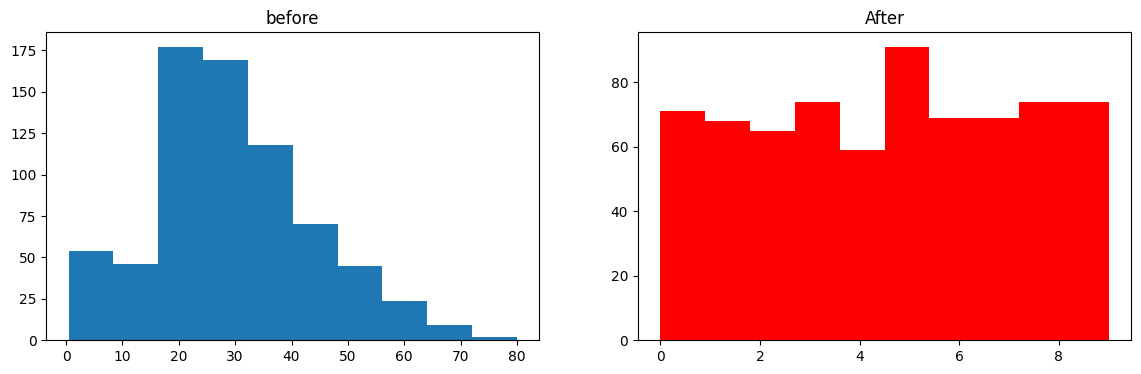

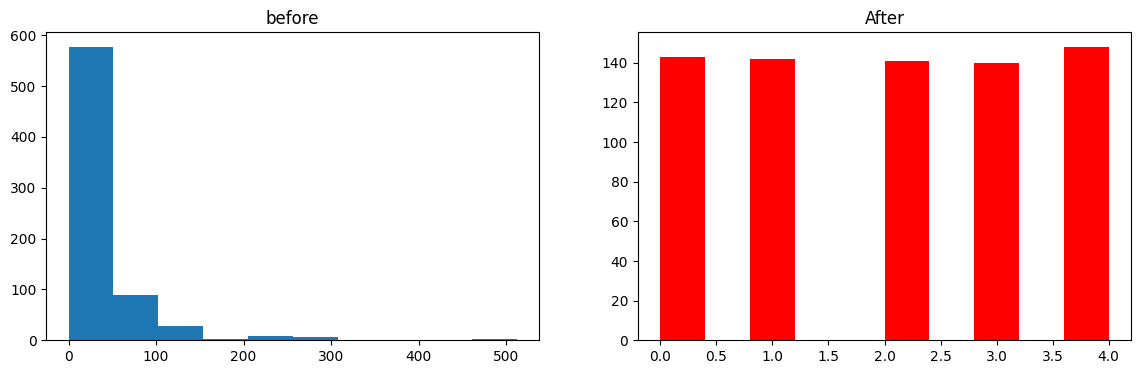

In [87]:
discretizer(10,'quantile')

0.6317097026604068


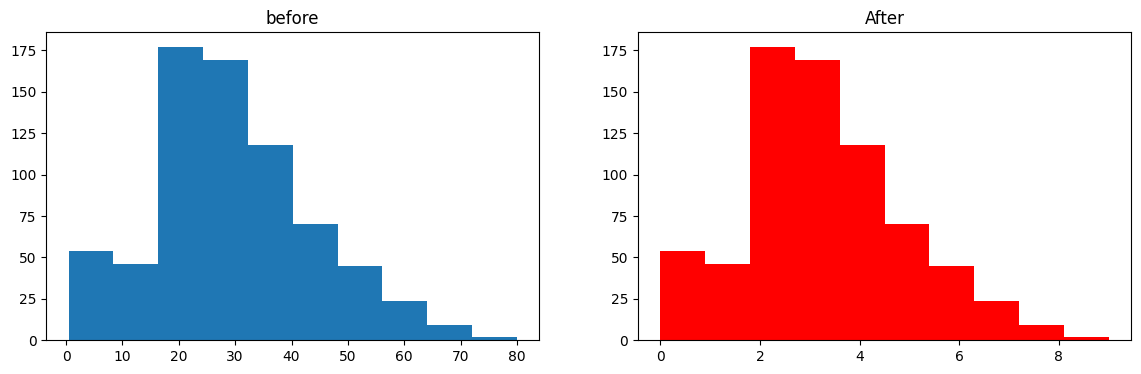

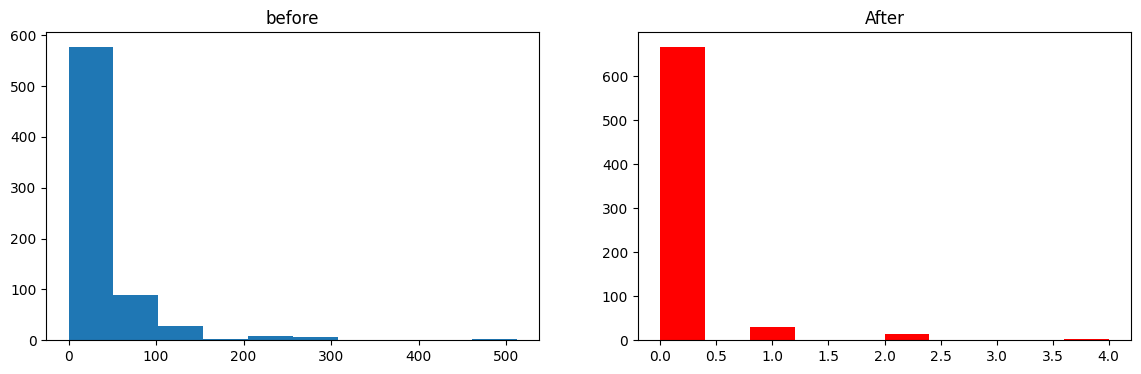

In [88]:
discretizer(10,'uniform')

0.6288732394366197


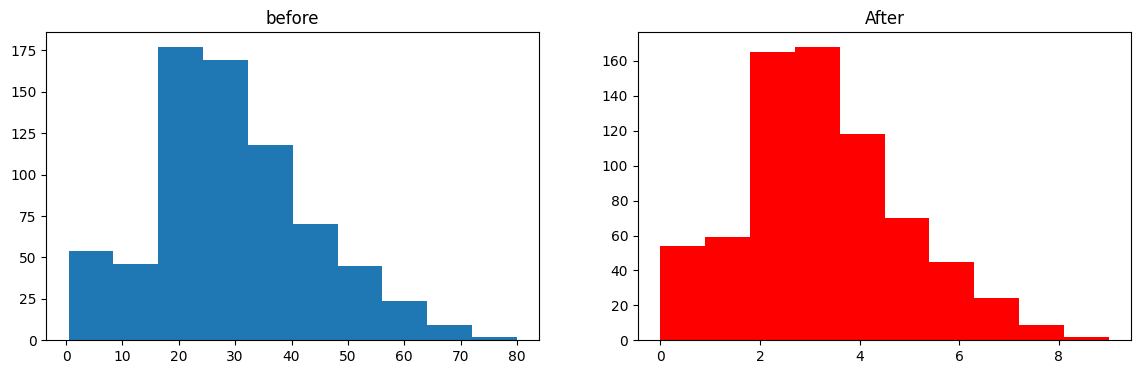

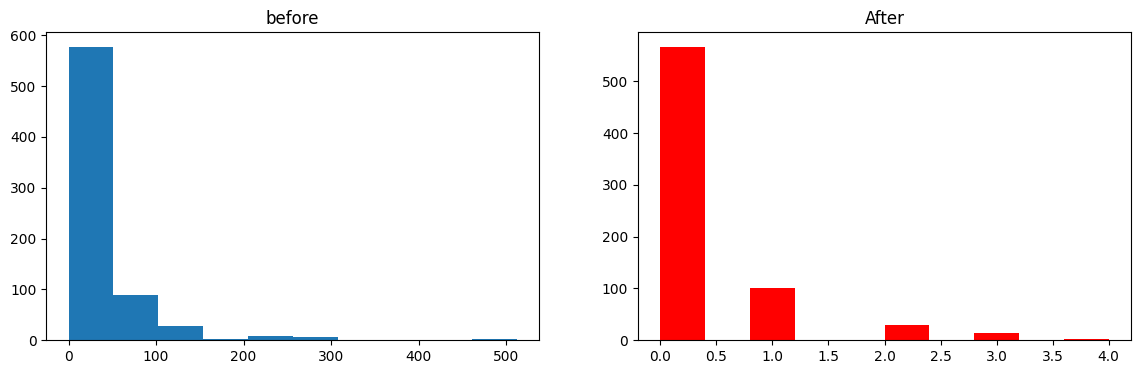

In [89]:
discretizer(10,'kmeans')

# |binarization

Binarization is a preprocessing technique which is used when we need to convert the data into binary numbers i.e., when we need to binarize the data. The scikit-learn function named Sklearn. preprocessing. binarize() is used to binarize the data.

sklearn.preprocessing.binarize(X, *, threshold=0.0, copy=True)

In [90]:
df=pd.read_csv('survival.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [91]:
df.dropna(inplace=True)

In [92]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [93]:
df['family']=df['SibSp']+df['Parch']

In [94]:
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [95]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [96]:
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [97]:
x=df.iloc[:,1:]
x

,Age,Fare,family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,5
886,27.0,13.0000,0
887,19.0,30.0000,0
889,26.0,30.0000,0


In [98]:
y=df['Survived']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
x_train

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0
...,...,...,...
92,46.0,61.1750,1
134,25.0,13.0000,0
337,41.0,134.5000,0
548,33.0,20.5250,2


In [105]:
x_test

,Age,Fare,family
149,42.0,13.0000,0
407,3.0,18.7500,2
53,29.0,26.0000,1
369,24.0,69.3000,0
818,43.0,6.4500,0
...,...,...,...
819,10.0,27.9000,5
164,1.0,39.6875,5
363,35.0,7.0500,0
56,21.0,10.5000,0


In [101]:
# without binarization
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6223776223776224


0.647085289514867

In [102]:
# apply binarization
from sklearn.preprocessing import Binarizer

In [106]:
trf =ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [107]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [109]:
pd.DataFrame(x_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [110]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred=clf.predict(x_test_trf)
print(accuracy_score(y_test,y_pred))
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.5944055944055944


0.6400821596244132